## Objective

## K-means & Hierarchical Clustering 

This case requires developing a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the data dictionary for credit card dataset :

###### CUST_ID: Identification of credit cardholder (Categorical)

###### BALANCE: Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)) 

###### PURCHASES: Amount of purchases made from the account

###### ONEOFF_PURCHASES: Maximum purchase amount done in once

###### INSTALLMENTS_PURCHASES: Amount of purchase done in installments

###### CASH_ADVANCE: Cash in advance given by the user

###### PURCHASES_FREQUENCY: How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

###### ONEOFFPURCHASESFREQUENCY: How frequently purchases are happening at once (1 = frequently purchased, 0 = not frequently purchased)

###### PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being made (1 = frequently done, 0 = not frequently done)

###### CASHADVANCEFREQUENCY: How frequently the cash in advance is being paid 

###### CASHADVANCETRX: Number of transactions made with "Cash in Advance" PURCHASES_TRX: Number of purchase transactions made

###### CREDIT_LIMIT: Limit of credit card for user 

PAYMENTS: Amount of payment done by user MINIMUM_PAYMENTS: Minimum amount of payments made by user. PRCFULLPAYMENT: Percent of full payment paid by user. TENURE: Tenure of credit card service for user

1. Load your dataset. 

2. Use hierarchical clustering to identify the inherent groupings within your data.

3. Plot the clusters. 

4. Plot the dendrogram. Use K-means clustering. 

5. Try different K values and select the best one. 

6. Plot the clusters. 

7. Compare the two results. 

Bonus: Search for another validation metric

### 1. Load your dataset.

In [2]:
# Preprocessing phase.
import pandas as pd
data = pd.read_csv("CC GENERAL.csv")
# Head of the Dataset
data.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### 2. Use hierarchical clustering to identify the inherent groupings within your data.

#### 3. Plot the clusters. 

In [6]:
dataset=data.drop("CUST_ID", axis=1)

In [7]:
dataset.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [8]:
dataset.CREDIT_LIMIT.fillna(dataset.CREDIT_LIMIT.mean(), inplace = True )

In [9]:
dataset.MINIMUM_PAYMENTS.fillna(dataset.MINIMUM_PAYMENTS.mean(), inplace = True )

In [10]:
dataset.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(dataset)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [15]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,2
1,2
2,2
3,2
4,2
...,...
8945,2
8946,2
8947,2
8948,2


In [16]:
agglomerative.value_counts()

2    8920
0      22
1       7
3       1
dtype: int64

In [19]:
dataset.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


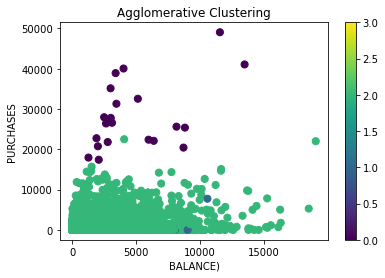

In [26]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (dataset ['BALANCE'] , dataset ["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE)")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

#### 4. Plot the dendrogram. 

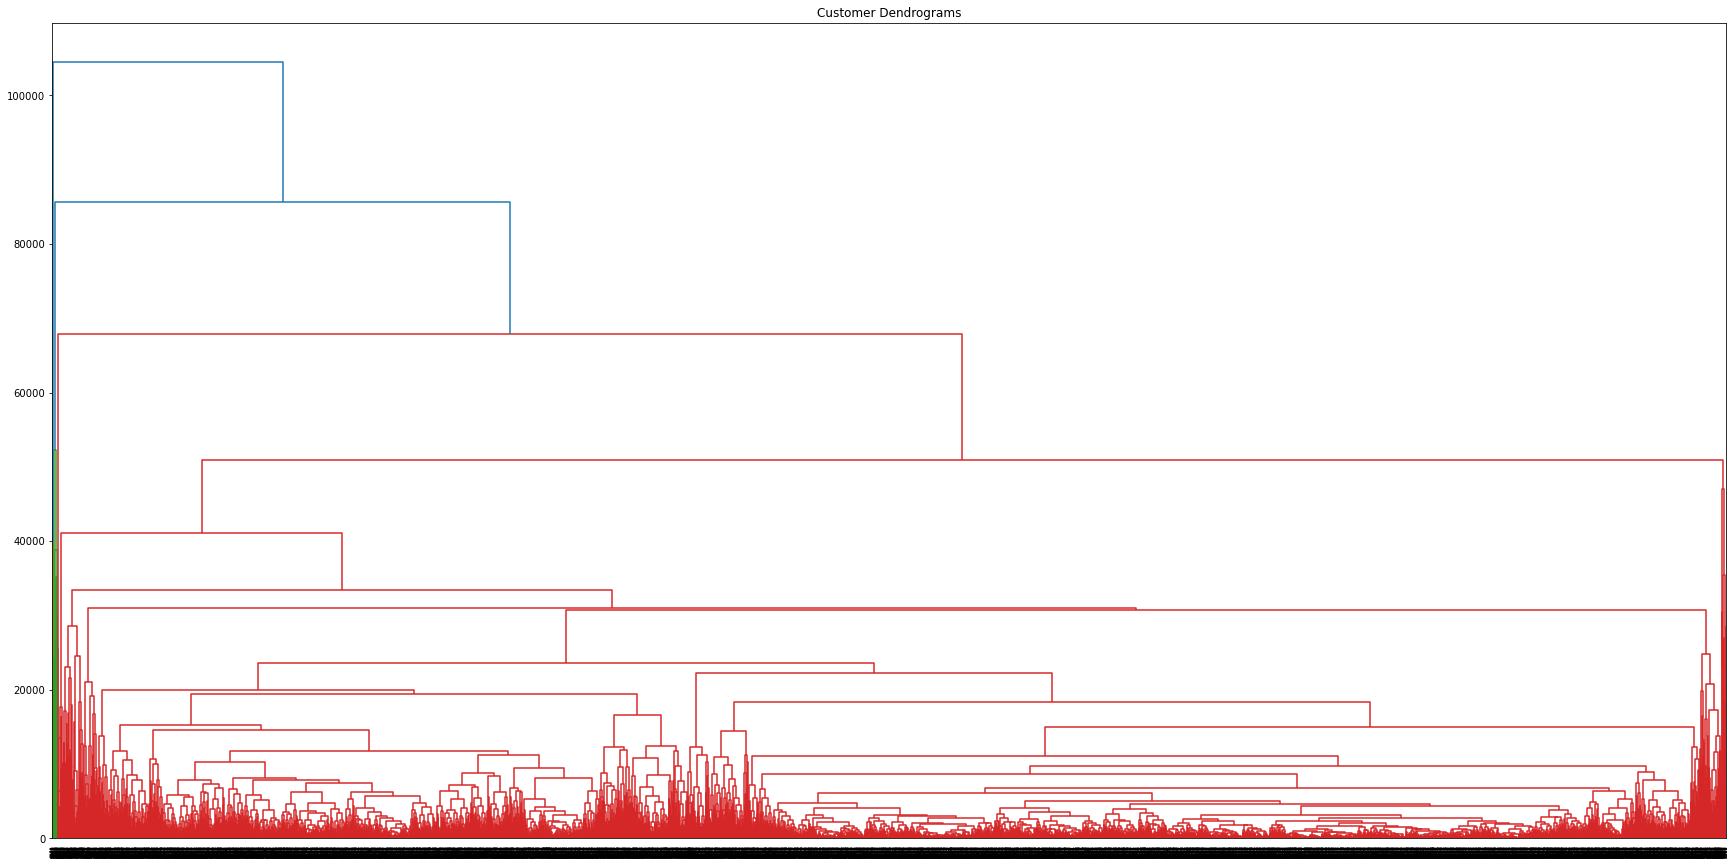

In [27]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,15))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(dataset, method="complete"))

#### Use K-means clustering. 

#### 5. Try different K values and select the best one. 

#### 6. Plot the clusters. 

In [28]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(dataset)

KMeans(n_clusters=5, random_state=0)

In [31]:
labels=pd.DataFrame(kmeans.labels_)
labels.value_counts()

2    5417
0    2478
3     887
1     112
4      56
dtype: int64

In [32]:
kmeans.predict(dataset)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[1.64537108e+03 9.06571096e-01 1.45419148e+03 9.06744948e+02
  5.47837125e+02 8.37160309e+02 5.79867638e-01 3.29338718e-01
  4.01525477e-01 1.16996605e-01 2.74395161e+00 2.08137097e+01
  6.83100257e+03 2.00861580e+03 6.51292434e+02 1.96350019e-01
  1.17564516e+01]
 [4.77562301e+03 9.07656920e-01 1.17303879e+04 8.39438634e+03
  3.33619804e+03 5.15643806e+03 7.66152580e-01 6.22972723e-01
  6.10439875e-01 2.05018920e-01 8.76785714e+00 8.89910714e+01
  1.26651786e+04 1.90125148e+04 2.44038946e+03 3.56370107e-01
  1.18571429e+01]
 [7.90668870e+02 8.48861241e-01 4.87194995e+02 2.33808544e+02
  2.53687507e+02 4.86816632e+02 4.46712142e-01 1.26616459e-01
  3.43942985e-01 1.10376268e-01 2.30770652e+00 9.21604140e+00
  2.19408273e+03 8.77458997e+02 5.31582199e+02 1.45499032e-01
  1.13716503e+01]
 [5.47822012e+03 9.57426814e-01 1.53169429e+03 9.44610426e+02
  5.87159001e+02 3.83993108e+03 4.72730906e-01 2.67277979e-01
  3.49923368e-01 3.29140566e-01 9.69023569e+00 2.15005612e+01
  1.09480971e+04

In [38]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,2
1,3
2,0
3,0
4,2
...,...
8945,2
8946,2
8947,2
8948,2


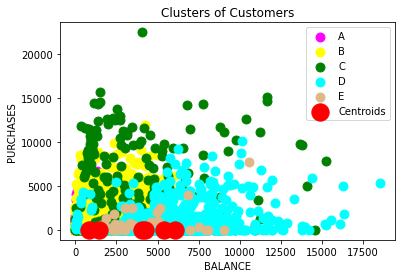

In [48]:
plt.scatter(data["BALANCE"][labels[0] == 0],          
            data["PURCHASES"][labels[0] == 0],s=80,c='magenta',label='A')
plt.scatter(data["BALANCE"][labels[0] == 1],
           data["PURCHASES"][labels[0] == 1],s=80,c='yellow',label='B')
plt.scatter(data["BALANCE"][labels[0] == 2],
           data["PURCHASES"][labels[0] == 2],s=80,c='green',label='C')
plt.scatter(data["BALANCE"][labels[0] == 3], 
           data["PURCHASES"][labels[0] == 3],s=80,c='cyan',label='D')
plt.scatter(data["BALANCE"][labels[0] == 4], 
           data["PURCHASES"][labels[0] == 4],s=80,c='burlywood',label='E')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [42]:
Sum_of_squared_distances =[]
k = range(1,15)
for k in k:
    km = KMeans(n_clusters =k)
    km = km.fit(dataset)
    Sum_of_squared_distances.append(km.inertia_)

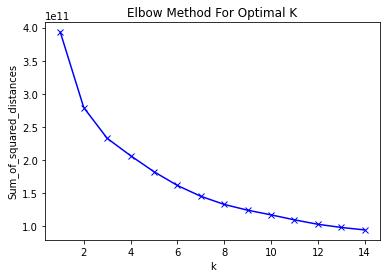

In [43]:
k = range(1,15)
plt.plot(k,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal K')
plt.show()

In [45]:
### ===> k =6

In [46]:
# k = 6

kmeans=KMeans(n_clusters=6, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(dataset)

KMeans(n_clusters=6, random_state=0)

In [47]:
labels=pd.DataFrame(kmeans.labels_)
labels.value_counts()

0    5640
1    2200
3     800
2     250
4      36
5      24
dtype: int64

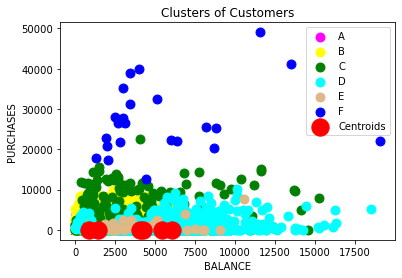

In [49]:
plt.scatter(data["BALANCE"][labels[0] == 0],          
            data["PURCHASES"][labels[0] == 0],s=80,c='magenta',label='A')
plt.scatter(data["BALANCE"][labels[0] == 1],
           data["PURCHASES"][labels[0] == 1],s=80,c='yellow',label='B')
plt.scatter(data["BALANCE"][labels[0] == 2],
           data["PURCHASES"][labels[0] == 2],s=80,c='green',label='C')
plt.scatter(data["BALANCE"][labels[0] == 3], 
           data["PURCHASES"][labels[0] == 3],s=80,c='cyan',label='D')
plt.scatter(data["BALANCE"][labels[0] == 4], 
           data["PURCHASES"][labels[0] == 4],s=80,c='burlywood',label='E')
plt.scatter(data["BALANCE"][labels[0] == 5], 
           data["PURCHASES"][labels[0] == 5],s=80,c='blue',label='F')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

#### 7. Compare the two results. 

Bonus: Search for another validation metric    

In [51]:
## Both methods showed similar results